#  Capstone_Project  :  XYZ Corp. Default Rate Prediction and Analysis

## Methodology

1. Exploratory Data Analysis (EDA)
2. Data Cleaning
3. Variable Transformations
4. Plots to study trends
5. Feature engineering and Variable Selection
6. Model Building and Validation
7. Preprocessing
8. Model Building, testing and validation
9. Model selection
10. Final results

In [1]:
# Numpy and Pandas for data manipulation
import numpy as np
import pandas as pd
# Matplotlib for data visulaization
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
# For Modeling
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Exploratory Data analysis(EDA):

In [2]:
# Views all rows and columns
pd.set_option("display.max_columns", None)

In [3]:
# Import Data
credit = pd.read_csv("C:\\Users\\HP\\Desktop\\Capston_Project\\Python\\XYZCorp_LendingData.txt", 
                   encoding = 'utf-8', sep = '\t', low_memory=False)
credit.shape

(855969, 73)

## Data Exploration :

In [4]:
credit.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
credit.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,n,NaN,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,29.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,140285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,n,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


In [6]:
# Number of Rows and Columns in data
print("Number of columns (features) in the given data is :", credit.shape[1])
print("Number of rows (entries) in the given data is :" , credit.shape[0])

Number of columns (features) in the given data is : 73
Number of rows (entries) in the given data is : 855969


In [7]:
target = credit['default_ind']
target.head()

0    0
1    1
2    0
3    0
4    0
Name: default_ind, dtype: int64

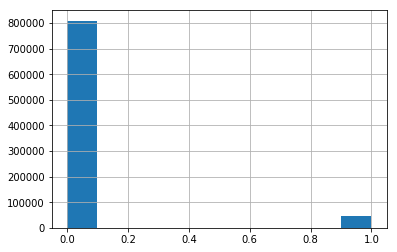

In [8]:
dist = target.hist()

In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

In [10]:
# Check Missing values
credit_null=credit.isnull().sum(axis=0).sort_values(ascending= False)/float(len(credit))

In [11]:
# Check whose missing values greater 74 %
credit_null[credit_null>0.74]

dti_joint                      0.999486
verification_status_joint      0.999484
annual_inc_joint               0.999484
il_util                        0.986438
mths_since_rcnt_il             0.984890
total_bal_il                   0.984476
inq_last_12m                   0.984476
open_acc_6m                    0.984476
open_il_6m                     0.984476
open_il_24m                    0.984476
open_il_12m                    0.984476
open_rv_12m                    0.984476
open_rv_24m                    0.984476
max_bal_bc                     0.984476
all_util                       0.984476
inq_fi                         0.984476
total_cu_tl                    0.984476
desc                           0.857691
mths_since_last_record         0.846742
mths_since_last_major_derog    0.750997
dtype: float64

In [12]:
# Drop null values from data
credit.drop(credit_null[credit_null>0.74].index, axis=1, inplace= True)

In [13]:
# Check rows and columns after drop null values
print("Number of remaining columns (features) in the given data is :", credit.shape[1])
print("Number of rows (entries) in the given data is :" , credit.shape[0])

Number of remaining columns (features) in the given data is : 53
Number of rows (entries) in the given data is : 855969


In [14]:
# Check types of application and their percent
credit["application_type"].value_counts()/len(credit)*100

INDIVIDUAL    99.948363
JOINT          0.051637
Name: application_type, dtype: float64

In [15]:
# Check types of acc_now_delinq and their percent
credit['acc_now_delinq'].value_counts()/len(credit)*100

0.0     99.540871
1.0      0.431441
2.0      0.023132
3.0      0.003271
4.0      0.000701
5.0      0.000350
6.0      0.000117
14.0     0.000117
Name: acc_now_delinq, dtype: float64

In [16]:
# Check types of pymnt_plan and their percent
credit['pymnt_plan'].value_counts()/len(credit)

n    0.999994
y    0.000006
Name: pymnt_plan, dtype: float64

# Variable Transformation:

After looking XYZCorp_Lending Data, we can also remove some of the variables, reasons are described below:
    1. id and member_id all are unique    
    2. plicy_code is always ==1
    3. payment_plan has only 10 years
    4. application_type is individual is around 0.99 % so this can also be removed
    5. acc_now_delinq is 0 for 99.5% of the records
    6. emp_title is not required
    7. zip_code is not required
    8. title can be removed

In [17]:
vars_must_removed= ['id','member_id','policy_code', 'application_type', 'pymnt_plan','acc_now_delinq','emp_title',\
                    'zip_code','title']

In [18]:
# drop the variables
credit.drop(vars_must_removed, axis=1, inplace= True)

In [19]:
# Remaining rows and columns in data
print("Number of remaining columns (features) in the given data is :", credit.shape[1])
print("Number of rows (entries) in the given data is :" , credit.shape[0])

Number of remaining columns (features) in the given data is : 44
Number of rows (entries) in the given data is : 855969


In [20]:
# Check null values
credit.isnull().sum()/len(credit)

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.050307
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
mths_since_last_delinq        0.513818
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.000521
total_acc                     0.000000
initial_list_status      

In [21]:
# Fill null value with mean
credit['mths_since_last_delinq']=credit['mths_since_last_delinq'].fillna(credit['mths_since_last_delinq'].mean())

In [22]:
# Check next payment date and their values
credit['next_pymnt_d'].value_counts()

Feb-2016    534094
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64

In [23]:
# Fill null values with mode
credit['next_pymnt_d']=credit['next_pymnt_d'].fillna('Feb-2016')

In [24]:
# Again check next payment date
credit['next_pymnt_d'].value_counts()

Feb-2016    787065
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64

In [25]:
# Check remaining null values and their percent
credit.isnull().sum()/len(credit)*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    5.030673
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
mths_since_last_delinq        0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.052105
total_acc                     0.000000
initial_list_status      

In [26]:
print(credit.emp_length.unique())
credit.emp_length.fillna('0',inplace=True)
credit.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(credit.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [27]:
# Remove all null values from the data
# credit=credit.dropna()

In [28]:
# Remaining rows and columns  
print("Number of remaining columns (features) in the given data is :", credit.shape[1])
print("Number of rows (entries) in the given data is :" , credit.shape[0])

Number of remaining columns (features) in the given data is : 44
Number of rows (entries) in the given data is : 855969


In [29]:
# getting all factor variables
factor_x = [col for col in credit.columns.values if credit[col].dtype == 'object']
data_cat = credit[factor_x]

# Plots to study Trends:

### Categorical Variables plots:

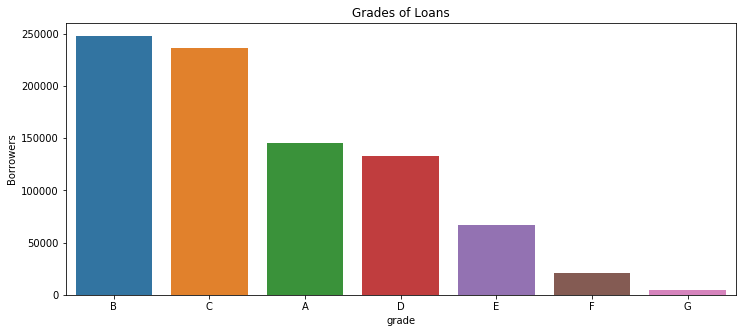

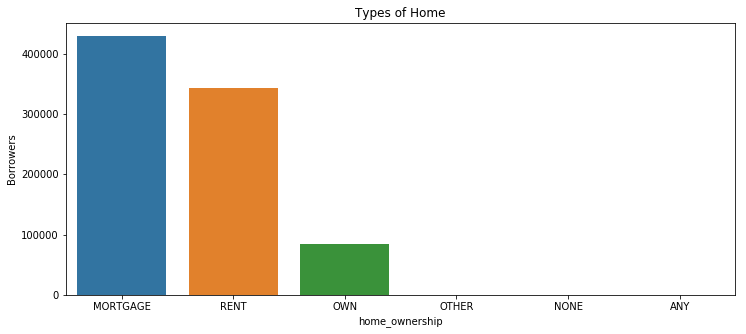

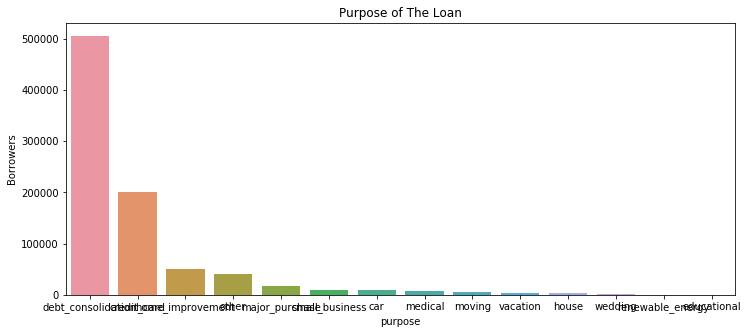

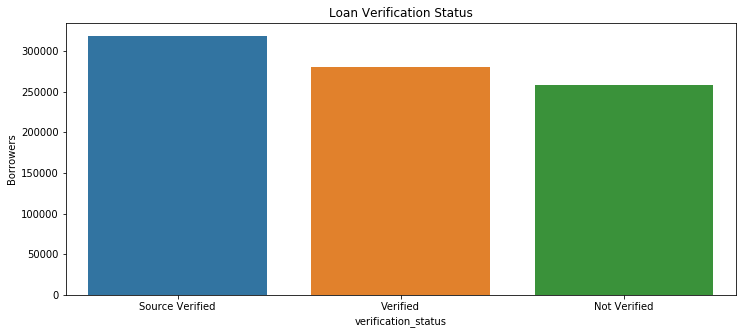

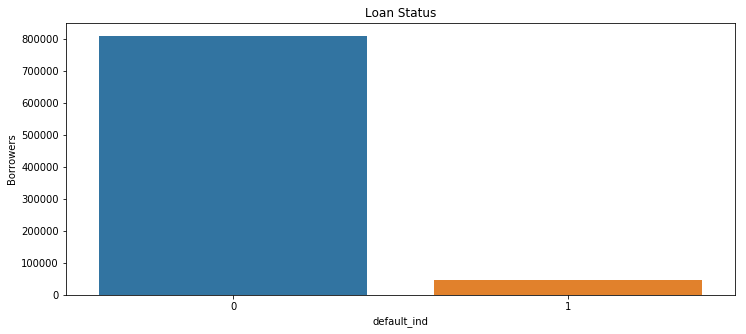

In [30]:
grade=credit['grade'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Grades of Loans')
plt.ylabel('Borrowers')
plt.xlabel('grade')
sns.barplot(x=grade.index, y=grade.values)

home=credit['home_ownership'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Types of Home')
plt.xlabel('home_ownership')
plt.ylabel('Borrowers')
sns.barplot(x=home.index, y=home.values)

purpose=credit['purpose'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Purpose of The Loan')
plt.ylabel('Borrowers')
plt.xlabel('purpose')
sns.barplot(x=purpose.index, y=purpose.values)

verifi_status= credit['verification_status'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Loan Verification Status')
plt.ylabel('Borrowers')
plt.xlabel('verification_status')
sns.barplot(x=verifi_status.index , y=verifi_status.values)

default=credit['default_ind'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Loan Status')
plt.ylabel('Borrowers')
plt.xlabel('default_ind')
sns.barplot(x=default.index, y= default.values)

### Numerical Variables Plot:

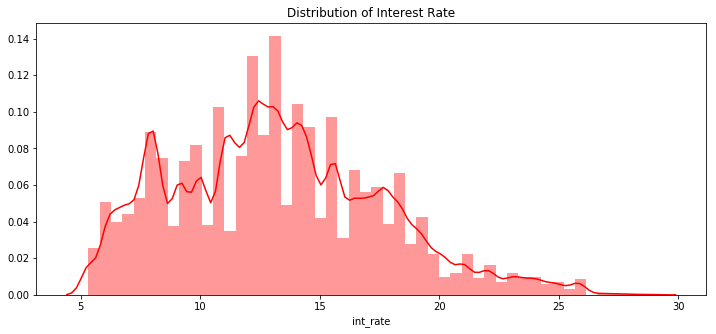

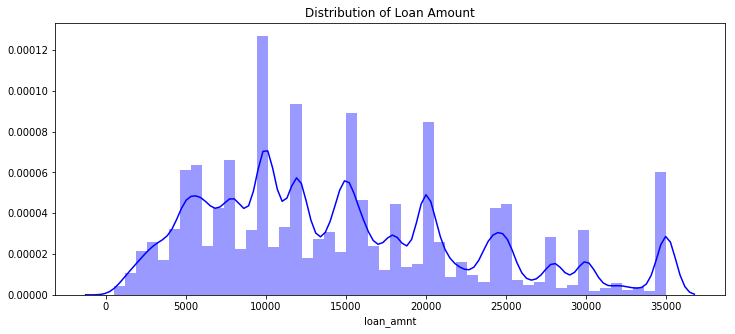

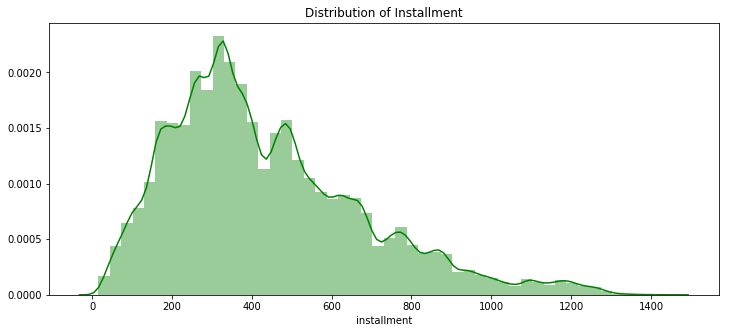

In [31]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Interest Rate')
sns.distplot(credit['int_rate'], color='r')

plt.figure(figsize=(12,5))
plt.title('Distribution of Loan Amount')
sns.distplot(credit['loan_amnt'], color='b')

plt.figure(figsize=(12,5))
plt.title('Distribution of Installment')
sns.distplot(credit['installment'], color='g')

In [32]:
# Create new variables
credit['amt_difference'] = 'eq'
credit.loc[ ( credit['funded_amnt'] - credit['funded_amnt_inv']) > 0, 'amt_difference' ] = 'less'

In [33]:
# Check unique value in amt_difference
credit['amt_difference'].unique()

array(['less', 'eq'], dtype=object)

## Create new metric

In [34]:
# Create new variable
credit['acc_ratio'] = credit.open_acc / credit.total_acc

## Variable Transformation:

In [35]:
# strip months from 'term' and make it an int
credit['term'] = credit['term'].str.split(' ').str[1]

# extract numbers from emp_length and fill missing values with the median
credit['emp_length'] = credit['emp_length'].str.extract('(\d+)').astype(float)

col_dates = credit.dtypes[credit.dtypes == 'datetime64[ns]'].index
for d in col_dates:
    credit[d] = credit[d].dt.to_period('M')

# Outlier Detection:

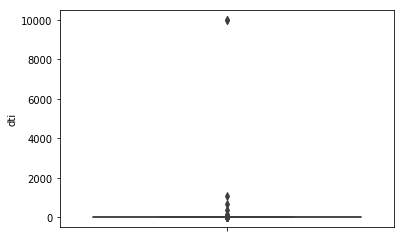

In [36]:
# Outlier detection in dti 
sns.boxplot(credit['dti'], orient= 'v')

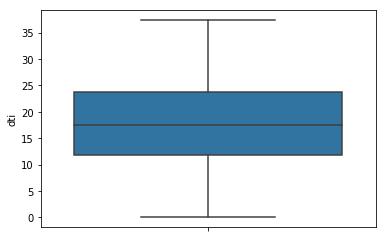

In [37]:
# Remove outlier on the basis of class interval
q = credit["dti"].quantile(0.99)
q
credit = credit[ (credit["dti"] <= q) | (credit["dti"].isnull())]
sns.boxplot(credit['dti'],orient= 'v')

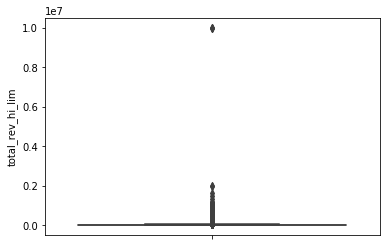

In [38]:
# Check outlier in 'total_rev_hi_lim'

sns.boxplot(credit['total_rev_hi_lim'], orient='v')

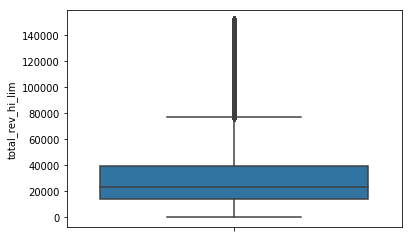

In [39]:
# Remove outlier on the basis of class interval

r = credit['total_rev_hi_lim'].quantile(0.99)
r
credit = credit[ (credit['total_rev_hi_lim'] <= r) | (credit['total_rev_hi_lim'].isnull())]
sns.boxplot(credit['total_rev_hi_lim'],orient= 'v')

## Correlation Plot (for Feature Selection):

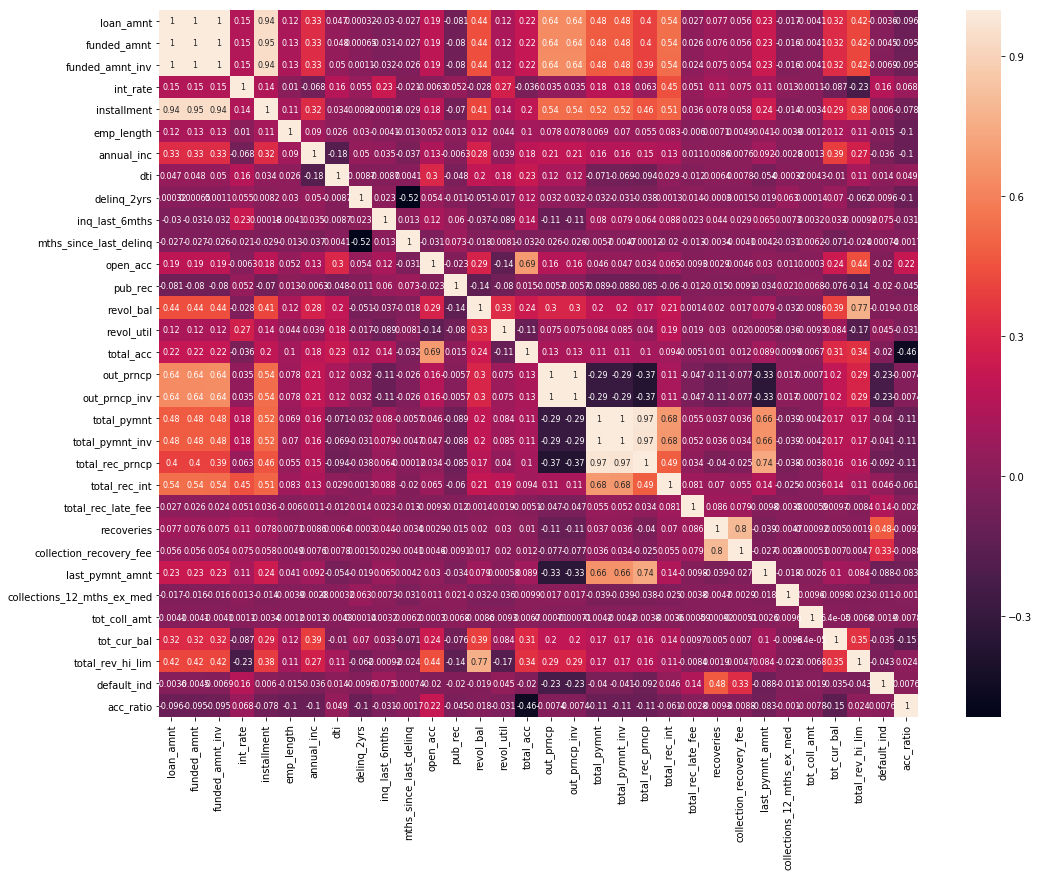

In [40]:
# correlation map

# numerical variables
# data_num = [col for col in credit.columns.values if credit[col].dtype == ['float64', 'int64']
            
data_num = credit.select_dtypes(include = ['float64','int64'])
data_cat = credit.select_dtypes(exclude = ['float64','int64'])

# correlation
correlation = data_num.corr()
plt.figure(figsize=(17,13))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})

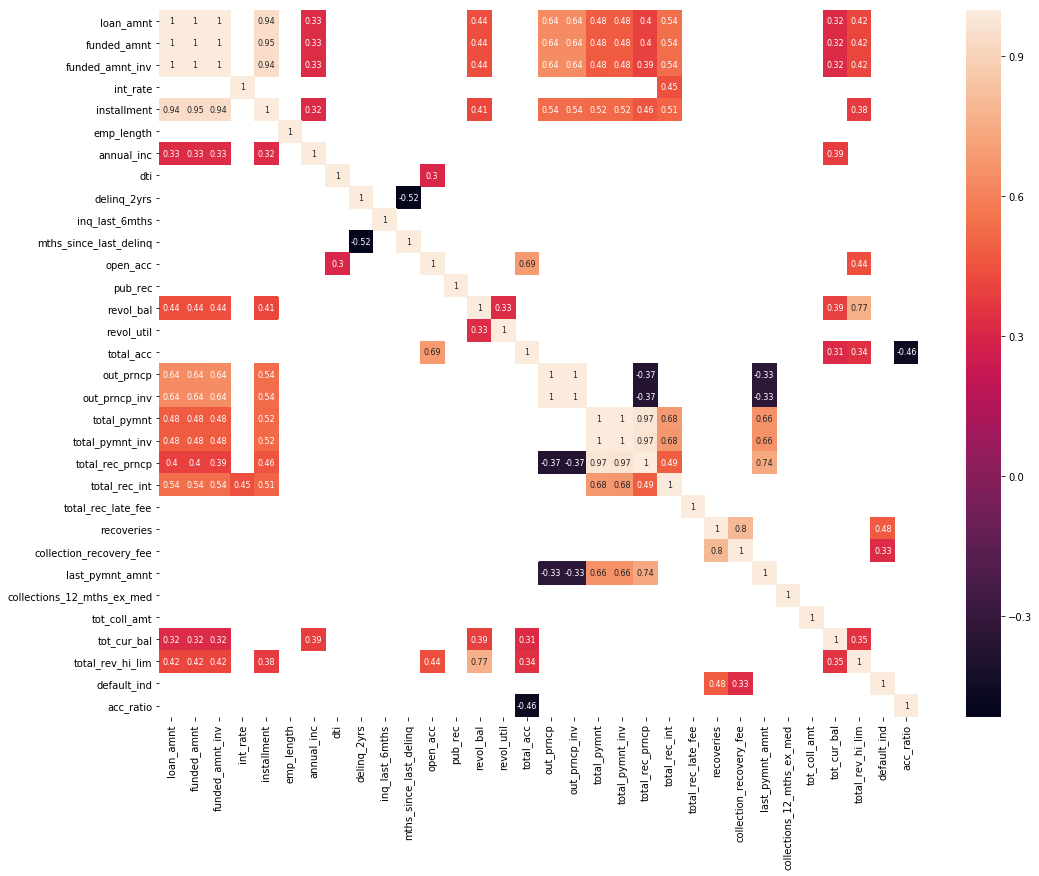

In [41]:
# correlation map
correlation = data_num.corr()
plt.figure(figsize=(17,13))
sns.heatmap(correlation[(correlation > 0.3) | (correlation < -0.3)],xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})

# Feature Selection for Model

In [43]:
# Features selection
features= ['loan_amnt', 'amt_difference', 'term', 'grade','emp_length','home_ownership','total_pymnt', 'annual_inc', \
           'verification_status', 'purpose','acc_ratio','initial_list_status','total_acc','total_rec_int','issue_d','delinq_2yrs',\
           'default_ind']

In [44]:
# Extract features from data
status= credit[features]

In [45]:
status_num = status.select_dtypes(include = ['float64','int64'])
status_obj = status.select_dtypes(exclude = ['float64','int64'])

In [46]:
status_num.columns

Index(['loan_amnt', 'emp_length', 'total_pymnt', 'annual_inc', 'acc_ratio',
       'total_acc', 'total_rec_int', 'delinq_2yrs', 'default_ind'],
      dtype='object')

In [47]:
status_obj.columns

Index(['amt_difference', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status', 'issue_d'],
      dtype='object')

In [48]:
mms= MinMaxScaler()

In [49]:
status_num.loc[:, status_num.columns != "default_ind"] = mms.fit_transform(status_num.loc[:, status_num.columns !="default_ind"])

In [50]:
status =status_num.join(status_obj)

In [51]:
# Name of the columns
status.columns

Index(['loan_amnt', 'emp_length', 'total_pymnt', 'annual_inc', 'acc_ratio',
       'total_acc', 'total_rec_int', 'delinq_2yrs', 'default_ind',
       'amt_difference', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status', 'issue_d'],
      dtype='object')

In [52]:
# Rearrange the order
status =status[['loan_amnt','emp_length','total_pymnt', 'annual_inc', 
       'acc_ratio', 'issue_d','total_rec_int', 'total_acc','amt_difference', 'term',
       'grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'delinq_2yrs','default_ind']]

In [53]:
status['issue_d'].unique()

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010',
       'Apr-2010', 'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009',
       'Nov-2009', 'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009',
       'Jun-2009', 'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009',
       'Jan-2009', 'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008',
       'Aug-2008', 'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008',
       'Mar-2008', 'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007',
       'Oct-2007', 'Sep-2007', 'Aug-2007', 'Jul-2007', 'Jun-2007',
       'Dec-2013', 'Nov-2013', 'Oct-2013', 'Sep-2013', 'Aug-2013',
       'Jul-2013', 'Jun-2013', 'May-2013', 'Apr-2013', 'Mar-2013',
       'Feb-2013', 'Jan-2013', 'Dec-2012', 'Nov-2012', 'Oct-2012',
       'Sep-2012', 'Aug-2012', 'Jul-2012', 'Jun-2012', 'May-20

## Split Data:

In [54]:
# select test range data on the basis of month
test_data_range = ['Jun-2015','Jul-2015','Aug-2015','Sep-20015', 'Oct-2015','Nov-2015', 'Dec-2015']

In [55]:
# Extract test data from status variable
test= status.loc[status['issue_d'].isin(test_data_range)]

In [56]:
# Extract train data from status variable
train= status.loc[-status['issue_d'].isin(test_data_range)]

In [57]:
# Check rows and columns in Test and Train data sets
print(test.shape, train.shape)

(221880, 17) (617758, 17)


In [58]:
# Select dummy variables in train data
dummy= train.loc[:,train.dtypes==np.object]


In [59]:
# Check columns in dummy 
dummy.columns

Index(['issue_d', 'amt_difference', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status'],
      dtype='object')

In [60]:
# Remove issue_d from dummy
dummy=dummy.drop('issue_d', axis= 1)

In [61]:
# Create dummies 
dummy= pd.get_dummies(dummy)

In [62]:
# Rows and columns in dummy
dummy.shape

(617758, 36)

In [63]:
dummy.columns

Index(['amt_difference_eq', 'amt_difference_less', 'term_36', 'term_60',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w'],
      dtype='object')

In [64]:
# Remove dummy variable from train because it create duplication in train 
train = train.drop(['amt_difference', 'term', 'grade', 'home_ownership','verification_status', 'purpose', 'initial_list_status'], axis=1)

In [65]:
# check remaining columns in train
train.columns

Index(['loan_amnt', 'emp_length', 'total_pymnt', 'annual_inc', 'acc_ratio',
       'issue_d', 'total_rec_int', 'total_acc', 'delinq_2yrs', 'default_ind'],
      dtype='object')

In [66]:
# add dummy variable with train
train= train.join(dummy)

In [67]:
# Check variables name in train data
train.columns

Index(['loan_amnt', 'emp_length', 'total_pymnt', 'annual_inc', 'acc_ratio',
       'issue_d', 'total_rec_int', 'total_acc', 'delinq_2yrs', 'default_ind',
       'amt_difference_eq', 'amt_difference_less', 'term_36', 'term_60',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w'],
      dtype

In [68]:
# Rearrange the order
train= train[['loan_amnt', 'emp_length','total_acc','total_rec_int','total_pymnt','annual_inc',
        'acc_ratio', 'issue_d','amt_difference_eq',
       'amt_difference_less', 'term_36', 'term_60', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w','delinq_2yrs','default_ind']]

In [69]:
# Extract independent variables from train data
x_train= train.iloc[:,:42]

In [70]:
# Check variables names in x_train
x_train.columns

Index(['loan_amnt', 'emp_length', 'total_acc', 'total_rec_int', 'total_pymnt',
       'annual_inc', 'acc_ratio', 'issue_d', 'amt_difference_eq',
       'amt_difference_less', 'term_36', 'term_60', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w', 'delinq_2yrs'],
      dtype='object')

In [71]:
# Extract dependent variables from train data
y_train=train['default_ind']

In [72]:
# Rows and columns in x_train and y_train
print(x_train.shape, y_train.shape)

(617758, 42) (617758,)


In [73]:
# Extract object variables in dummy 1 variables
dummy1= test.loc[:,test.dtypes==np.object]

In [74]:
# Columns names in dummy1 variables
dummy1.columns

Index(['issue_d', 'amt_difference', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status'],
      dtype='object')

In [75]:
# drop issue_d from dummy1
dummy1= dummy1.drop('issue_d', axis=1)

In [76]:
# create dummy variable
dummy1= pd.get_dummies(dummy1)

In [77]:
# Check columns names in dummy variables
dummy1.columns

Index(['amt_difference_eq', 'amt_difference_less', 'term_36', 'term_60',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w'],
      dtype='object')

In [78]:
# Drop object variables in test data
test= test.drop(['amt_difference', 'term', 'grade', 'home_ownership','verification_status', 'purpose', 'initial_list_status'], axis=1)

In [79]:
# Columns name in test data variable
test.columns

Index(['loan_amnt', 'emp_length', 'total_pymnt', 'annual_inc', 'acc_ratio',
       'issue_d', 'total_rec_int', 'total_acc', 'delinq_2yrs', 'default_ind'],
      dtype='object')

In [80]:
# Join dummy variable with test
test= test.join(dummy1)

In [81]:
# Reorder variables in test data
test= test[['loan_amnt', 'emp_length','total_rec_int','total_acc', 'total_pymnt','annual_inc',
       'acc_ratio', 'issue_d', 'amt_difference_eq',
       'amt_difference_less', 'term_36', 'term_60', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 
        'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w', 'delinq_2yrs','default_ind']]

In [82]:
# Rows and columns in test data
test.shape

(221880, 41)

In [83]:
# Extract independent variables from test data
x_test=test.iloc[:,:40]

In [84]:
# Extract dependent variables from test data
y_test= test['default_ind']

In [85]:
# Rows and columns in model
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(617758, 42) (221880, 40) (617758,) (221880,)


In [86]:
# For compare columns in test and train data 
print(x_train.columns, x_test.columns)

Index(['loan_amnt', 'emp_length', 'total_acc', 'total_rec_int', 'total_pymnt',
       'annual_inc', 'acc_ratio', 'issue_d', 'amt_difference_eq',
       'amt_difference_less', 'term_36', 'term_60', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w', 'delinq_2yrs'],
      dtype='object') Index(['loan_amnt', 'emp_length', 'total_rec_int', 'total_acc', 'total_pymnt',


In [87]:
# These columns are not present in x_test data so these are remove from x_train data
x_train.drop(['home_ownership_NONE', 'home_ownership_OTHER'], axis= 1, inplace= True)

In [88]:
# Total rows and columns
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(617758, 40)
(221880, 40)
(617758,)
(221880,)


In [89]:
# Drop issue_d from test and train data 
x_train= x_train.drop('issue_d', axis= 1)
x_test= x_test.drop('issue_d', axis= 1)

In [90]:
# Print all rows and columns in Test and Train
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(617758, 39)
(221880, 39)
(617758,)
(221880,)


# Model: Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score

lr= LogisticRegression()
lr.fit(x_train, y_train)
lr_predict= lr.predict(x_test)



# Accuracy:

In [92]:
# Print confusion Matrix and accuracy score
lr_conf_matrix= confusion_matrix(list(y_test), list(lr_predict))
lr_acc_score = accuracy_score(y_test, lr_predict)
print('Confusion Matrix:\n', lr_conf_matrix)

#Accuracy Score
print('Accuracy Score:', lr_acc_score*100)


Confusion Matrix:
 [[212768   8813]
 [   257     42]]
Accuracy Score: 95.9122047953849


In [93]:
from sklearn import metrics
y_score = lr.predict_proba(x_test)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)
print('AUC_Score:-',roc_auc)

## optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print('Optimal Threshold:-',optimal_threshold)

AUC_Score:- 0.7052760808201697
Optimal Threshold:- 0.15143703037170417


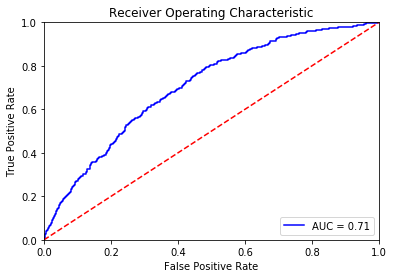

In [94]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model: Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier ()
dt.fit(x_train, y_train)
dt_predict= dt.predict(x_test)

In [96]:
# Print confusion Matrix and accuracy score
dt_conf_matrix= confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print('Confusion Matrix:\n',dt_conf_matrix)
print('Accuracy Score',dt_acc_score*100)

Confusion Matrix:
 [[ 63889 157692]
 [    63    236]]
Accuracy Score 28.900757166035696


In [97]:
from sklearn import metrics
y_score = dt.predict_proba(x_test)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)
print('AUC_Score:-',roc_auc)

## optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print('Optimal Threshold:-',optimal_threshold)

AUC_Score:- 0.5388150711218358
Optimal Threshold:- 1.0


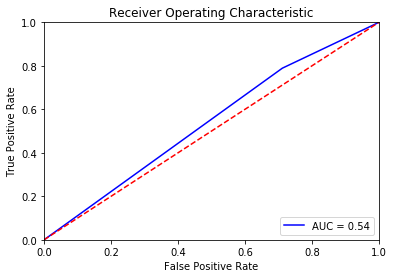

In [98]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model: Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train, y_train)
rf_predict= rf.predict(x_test)


In [100]:
# Print confusion Matrix and accuracy score
rf_conf_matrix= confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print('Confusion Matrix:\n',rf_conf_matrix)
print('Accuracy Score:',rf_acc_score*100)

Confusion Matrix:
 [[169231  52350]
 [   167    132]]
Accuracy Score: 76.33089958536145


In [101]:
from sklearn import metrics
y_score = rf.predict_proba(x_test)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)
print('AUC_Score:-',roc_auc)

## optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print('Optimal Threshold:-',optimal_threshold)

AUC_Score:- 0.6758855210153715
Optimal Threshold:- 0.4


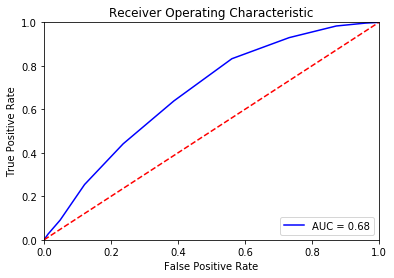

In [102]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()